#### Initial Data Compilation

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data

df_criminals = pd.read_csv('bfi_scores.csv')
df_noble=pd.read_csv('bfi_good.csv')
df_authors=pd.read_csv('bfi_authors.csv')
df_athletes=pd.read_csv('bfi_athletes.csv')
df_scientists=pd.read_csv('bfi_scientists.csv')
actors=pd.read_csv('bfi_actors.csv')
# Set a style for better-looking plots
plt.style.use("seaborn-v0_8")

In [20]:
df_list=[df_criminals,df_noble,df_authors,df_athletes,df_scientists,df_actors]

In [36]:
columns_list = ['Extraversion',	'Agreeableness',	'Conscientiousness',	'Neuroticism',	'Openness']
custom_names = ['criminals','noblewinners','authors','athletes','scientists','actors']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)
#print("§§§§§§§§§§§§§§§§§")
#print(cdf)
# Set 'DataFrame' as the index for easier reading
#cdf.set_index('DataFrame', inplace=True)
#print("&&&&&&&&&&&&&&&&&&&&&&&&")
# Display the comparison DataFrame
print(cdf)


       DataFrame          Attribute      Mean       Std
0      criminals       Extraversion  3.051136  0.463968
1      criminals      Agreeableness  2.964646  0.313120
2      criminals  Conscientiousness  3.181818  0.545998
3      criminals        Neuroticism  2.960227  0.447191
4      criminals           Openness  3.172727  0.409624
5   noblewinners       Extraversion  3.041667  0.478169
6   noblewinners      Agreeableness  3.063524  0.548384
7   noblewinners  Conscientiousness  3.005381  0.496103
8   noblewinners        Neuroticism  2.946429  0.384406
9   noblewinners           Openness  3.280952  0.451242
10       authors       Extraversion  3.181250  0.463246
11       authors      Agreeableness  3.066600  0.331081
12       authors  Conscientiousness  3.177750  0.336874
13       authors        Neuroticism  2.962500  0.474861
14       authors           Openness  3.265000  0.354334
15      athletes       Extraversion  3.142045  0.452005
16      athletes      Agreeableness  3.141409  0

In [44]:
print(cdf.columns)
print(cdf.head())

Index(['DataFrame', 'Attribute', 'Mean', 'Std'], dtype='object')
   DataFrame          Attribute      Mean       Std
0  criminals       Extraversion  3.051136  0.463968
1  criminals      Agreeableness  2.964646  0.313120
2  criminals  Conscientiousness  3.181818  0.545998
3  criminals        Neuroticism  2.960227  0.447191
4  criminals           Openness  3.172727  0.409624


In [47]:
# Reshape the DataFrame to have attributes as columns
plot_df = cdf.pivot(index='DataFrame', columns='Attribute', values='Mean')
plot_df

Attribute,Agreeableness,Conscientiousness,Extraversion,Neuroticism,Openness
DataFrame,,,,,
actors,3.172100,3.061050,3.237500,3.025000,3.305000
athletes,3.141409,3.192000,3.142045,2.988636,3.304545
authors,3.066600,3.177750,3.181250,2.962500,3.265000
criminals,2.964646,3.181818,3.051136,2.960227,3.172727
noblewinners,3.063524,3.005381,3.041667,2.946429,3.280952
scientists,3.049950,3.399950,3.143750,2.900000,3.310000


In [49]:
# First, let's identify the correct column names
df_column = cdf.columns[0]  # Assumes the DataFrame/Group name is the first column
attribute_column = cdf.columns[1]  # Assumes the attribute name is the second column
mean_column = cdf.columns[2]  # Assumes the mean value is the third column

# Reshape the DataFrame to have attributes as columns
plot_df = cdf.pivot(index=df_column, columns=attribute_column, values=mean_column)
plot_df

Attribute,Agreeableness,Conscientiousness,Extraversion,Neuroticism,Openness
DataFrame,,,,,
actors,3.172100,3.061050,3.237500,3.025000,3.305000
athletes,3.141409,3.192000,3.142045,2.988636,3.304545
authors,3.066600,3.177750,3.181250,2.962500,3.265000
criminals,2.964646,3.181818,3.051136,2.960227,3.172727
noblewinners,3.063524,3.005381,3.041667,2.946429,3.280952
scientists,3.049950,3.399950,3.143750,2.900000,3.310000


In [48]:
from pandas.plotting import parallel_coordinates
# Create the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(plot_df, 'Attribute', colormap=plt.cm.Set2)

# Customize the plot
plt.title('Parallel Coordinates Plot of Mean Values')
plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.legend(title='DataFrame', loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

KeyError: 'Attribute'

<Figure size 1200x600 with 0 Axes>

#### Group result

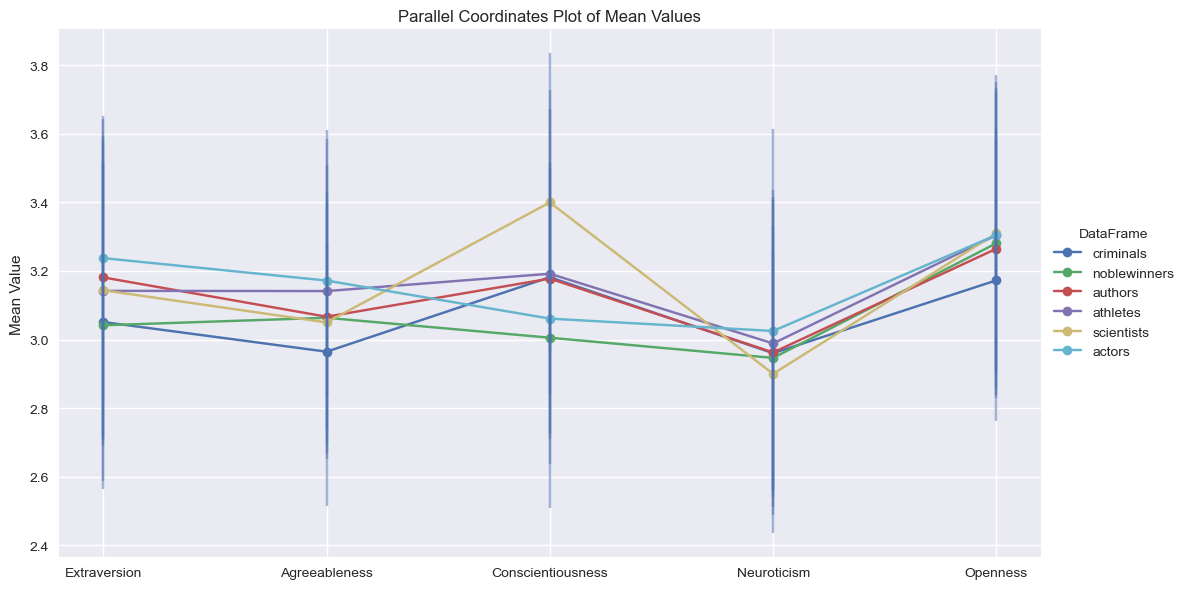

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cdf is your DataFrame with the results

# Identify the unique DataFrames and Columns
dataframes = cdf['DataFrame'].unique()
columns = cdf['Attribute'].unique()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each DataFrame
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.plot(df_data['Attribute'], df_data['Mean'], marker='o', label=df_name)

# Customize the plot
ax.set_xticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_ylabel('Mean Value')
ax.set_title('Parallel Coordinates Plot of Mean Values')
ax.legend(title='DataFrame', loc='center left', bbox_to_anchor=(1, 0.5))

# Add error bars for standard deviation
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.errorbar(df_data['Attribute'], df_data['Mean'], yerr=df_data['Std'], 
                fmt='none', capsize=5, alpha=0.5)

plt.tight_layout()
plt.show()

#### Misc

In [7]:
df.describe()

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,3.051136,2.964646,3.181818,2.960227,3.172727
std,0.463968,0.313120,0.545998,0.447191,0.409624
min,2.250000,2.333333,2.444444,1.750000,2.400000
25%,2.750000,2.777778,2.833333,2.781250,2.825000
50%,3.000000,2.888889,3.111111,2.937500,3.300000
75%,3.468750,3.111111,3.305556,3.218750,3.500000
max,3.875000,3.777778,4.555556,3.875000,3.700000


In [13]:
df2 = pd.DataFrame(df.describe())
df2 = df2.reset_index()


In [15]:
df2

,index,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,count,22.000000,22.000000,22.000000,22.000000,22.000000
1,mean,3.051136,2.964646,3.181818,2.960227,3.172727
2,std,0.463968,0.313120,0.545998,0.447191,0.409624
3,min,2.250000,2.333333,2.444444,1.750000,2.400000
4,25%,2.750000,2.777778,2.833333,2.781250,2.825000
5,50%,3.000000,2.888889,3.111111,2.937500,3.300000
6,75%,3.468750,3.111111,3.305556,3.218750,3.500000
7,max,3.875000,3.777778,4.555556,3.875000,3.700000


In [18]:
df['Extraversion'].mean()

np.float64(3.0511363636363638)

#### Visualisations for Criminal group

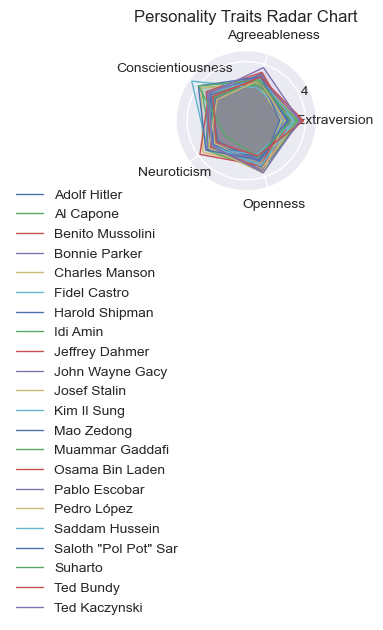

In [3]:
def radar_chart(df):
    # Number of variables
    categories = list(df.columns)[1:]
    N = len(categories)
    
    # Create a figure and polar axes
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))
    
    # Angle of each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Plot data
    for i, person in df.iterrows():
        values = person.drop('Persona').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=person['Persona'])
        ax.fill(angles, values, alpha=0.1)
    
    # Set category labels
    plt.xticks(angles[:-1], categories)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.title("Personality Traits Radar Chart")
    plt.tight_layout()
    plt.show()

radar_chart(df)  # Plot for first 5 people

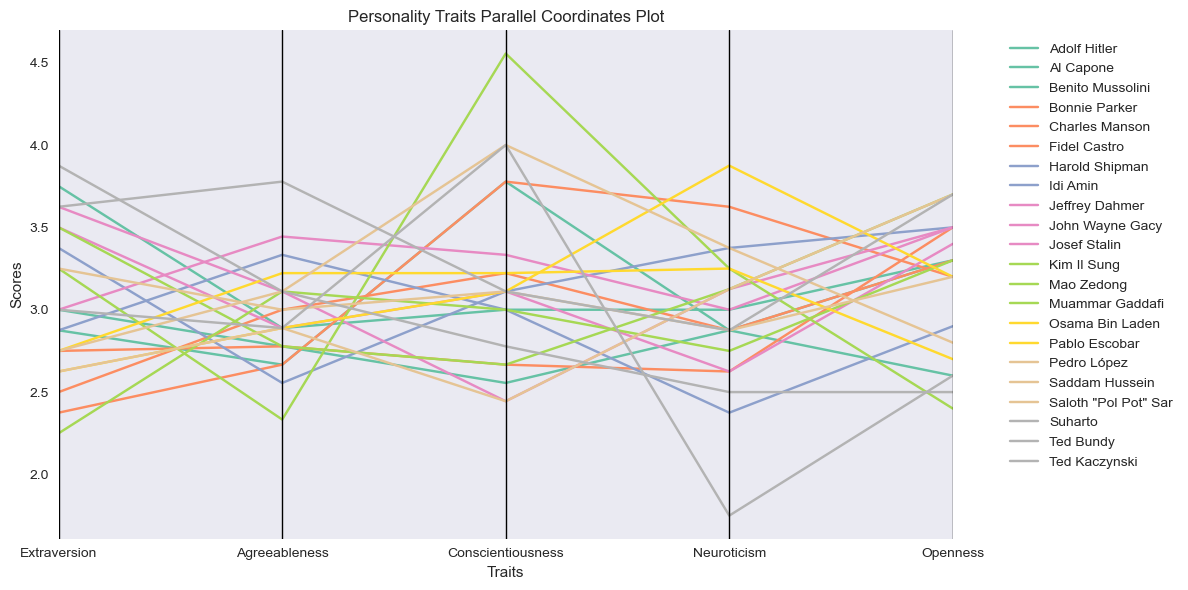

In [6]:
def parallel_coordinates_plot(df):
    plt.figure(figsize=(12, 6))
    pd.plotting.parallel_coordinates(df, 'Persona', colormap=plt.cm.Set2)
    plt.title("Personality Traits Parallel Coordinates Plot")
    plt.xlabel("Traits")
    plt.ylabel("Scores")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

parallel_coordinates_plot(df)

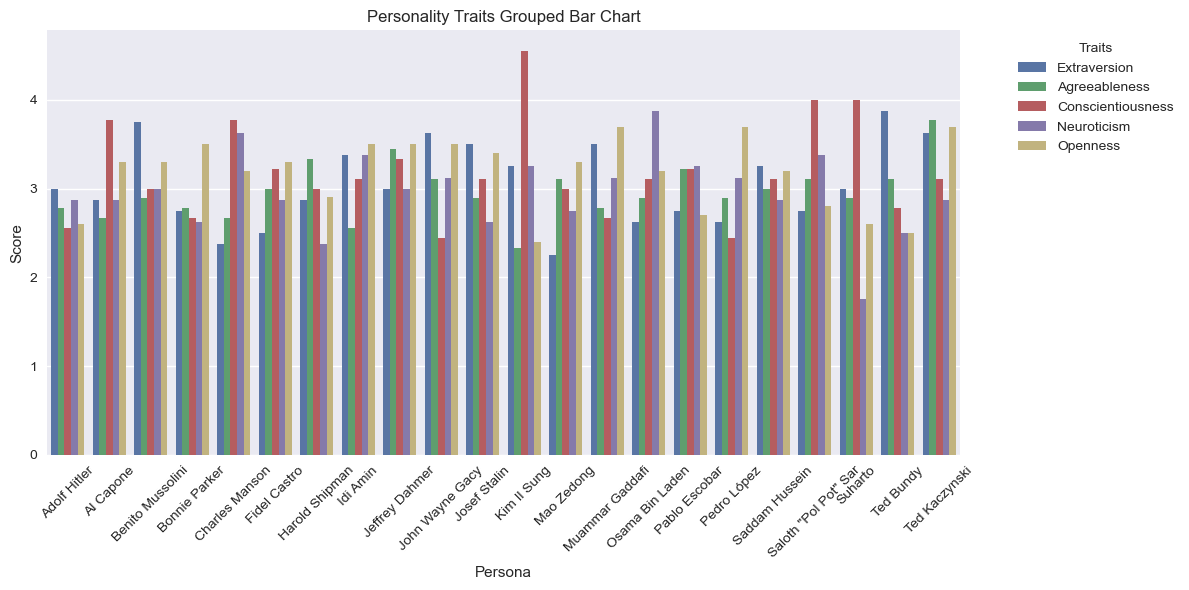

In [7]:
def grouped_bar_chart(df):
    df_melted = df.melt(id_vars=['Persona'], var_name='Trait', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Persona', y='Score', hue='Trait', data=df_melted)
    plt.title("Personality Traits Grouped Bar Chart")
    plt.xlabel("Persona")
    plt.ylabel("Score")
    plt.legend(title="Traits", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

grouped_bar_chart(df)

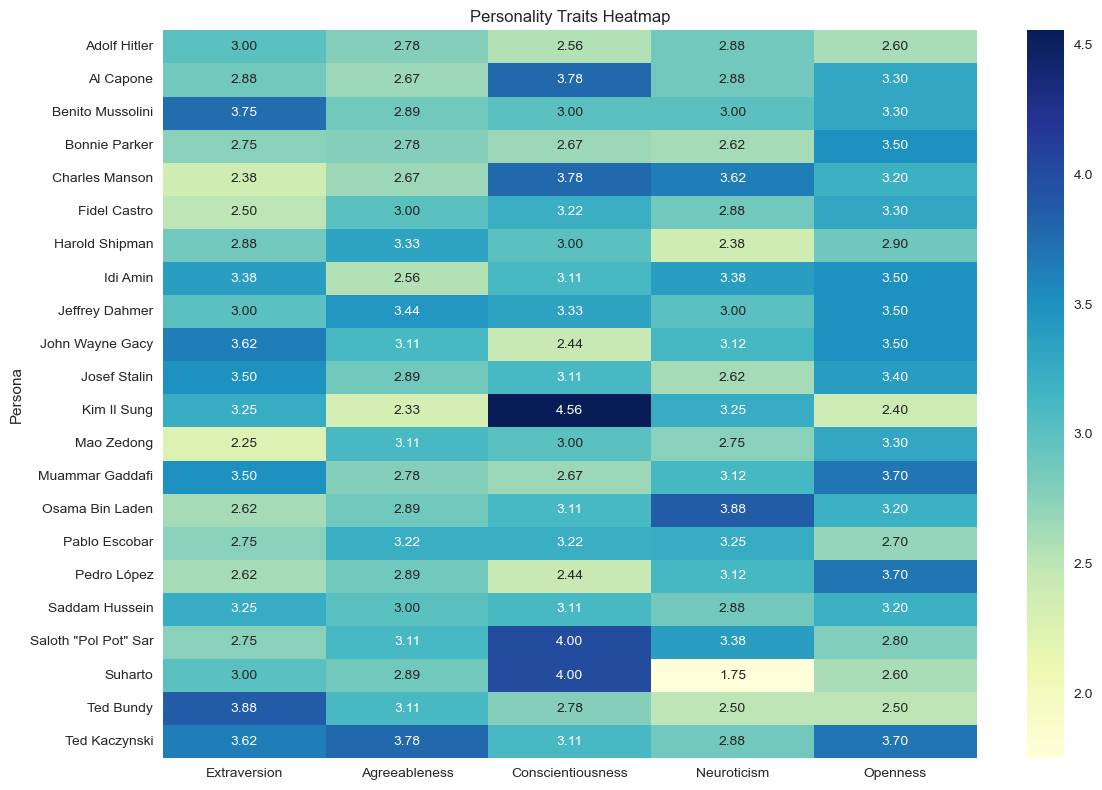

In [8]:
def heatmap(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.set_index('Persona'), annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title("Personality Traits Heatmap")
    plt.tight_layout()
    plt.show()

heatmap(df)

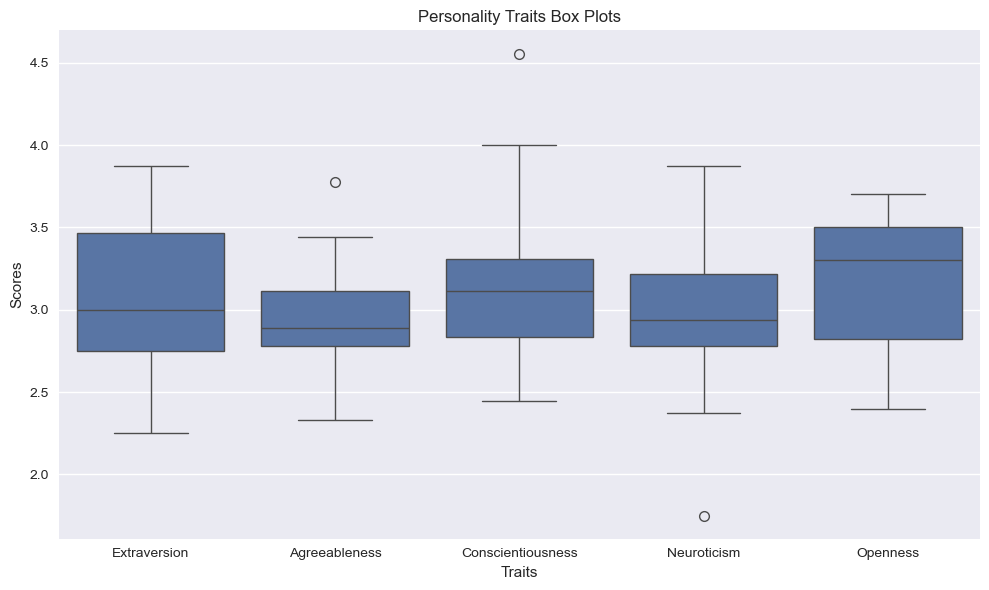

In [9]:
def box_plots(df):
    df_melted = df.melt(id_vars=['Persona'], var_name='Trait', value_name='Score')
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Trait', y='Score', data=df_melted)
    plt.title("Personality Traits Box Plots")
    plt.xlabel("Traits")
    plt.ylabel("Scores")
    plt.tight_layout()
    plt.show()

box_plots(df)

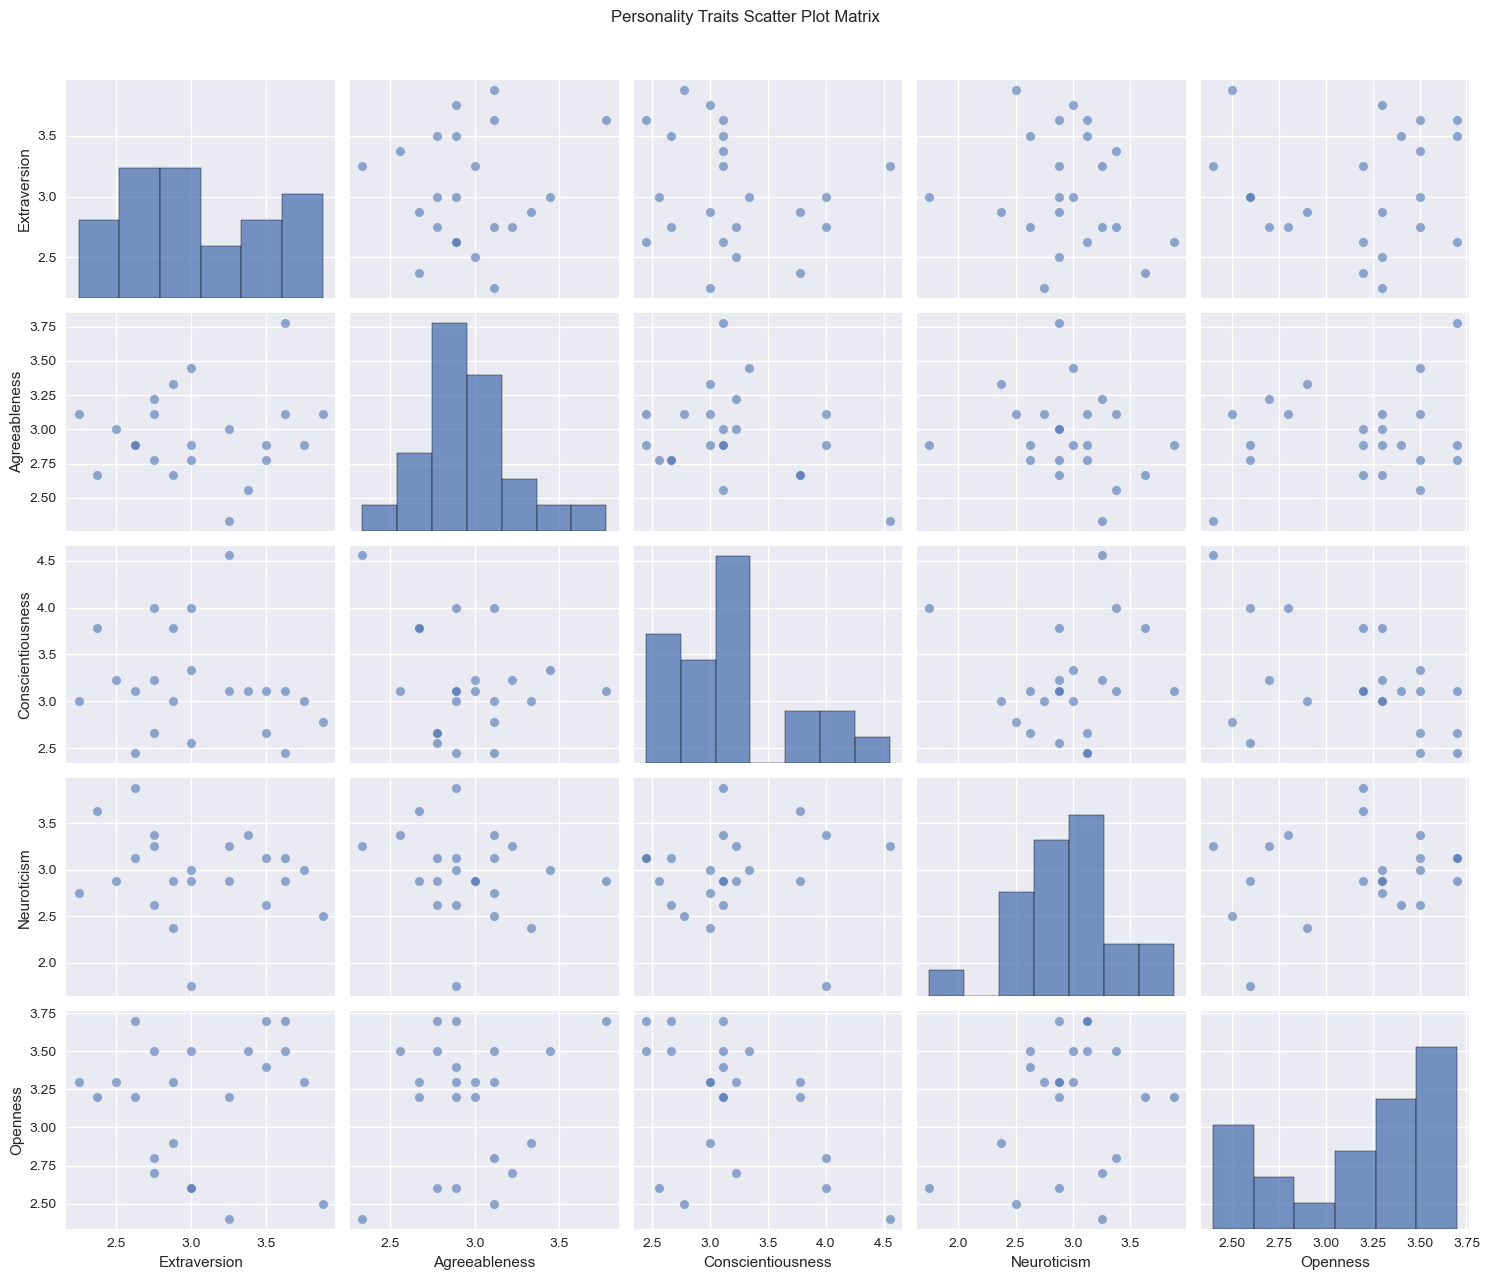

In [10]:
def scatter_plot_matrix(df):
    traits = df.columns[1:]  # Exclude 'Persona' column
    sns.pairplot(df, vars=traits, height=2.5, aspect=1.2, plot_kws={'alpha': 0.6})
    plt.suptitle("Personality Traits Scatter Plot Matrix", y=1.02)
    plt.tight_layout()
    plt.show()

scatter_plot_matrix(df)

<Figure size 1200x600 with 0 Axes>

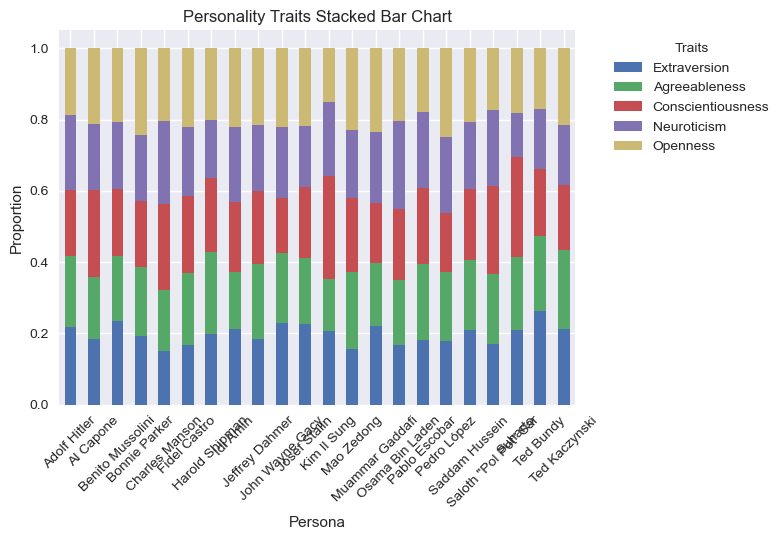

In [11]:
def stacked_bar_chart(df):
    df_norm = df.set_index('Persona')
    df_norm = df_norm.div(df_norm.sum(axis=1), axis=0)
    
    plt.figure(figsize=(12, 6))
    df_norm.plot(kind='bar', stacked=True)
    plt.title("Personality Traits Stacked Bar Chart")
    plt.xlabel("Persona")
    plt.ylabel("Proportion")
    plt.legend(title="Traits", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

stacked_bar_chart(df)

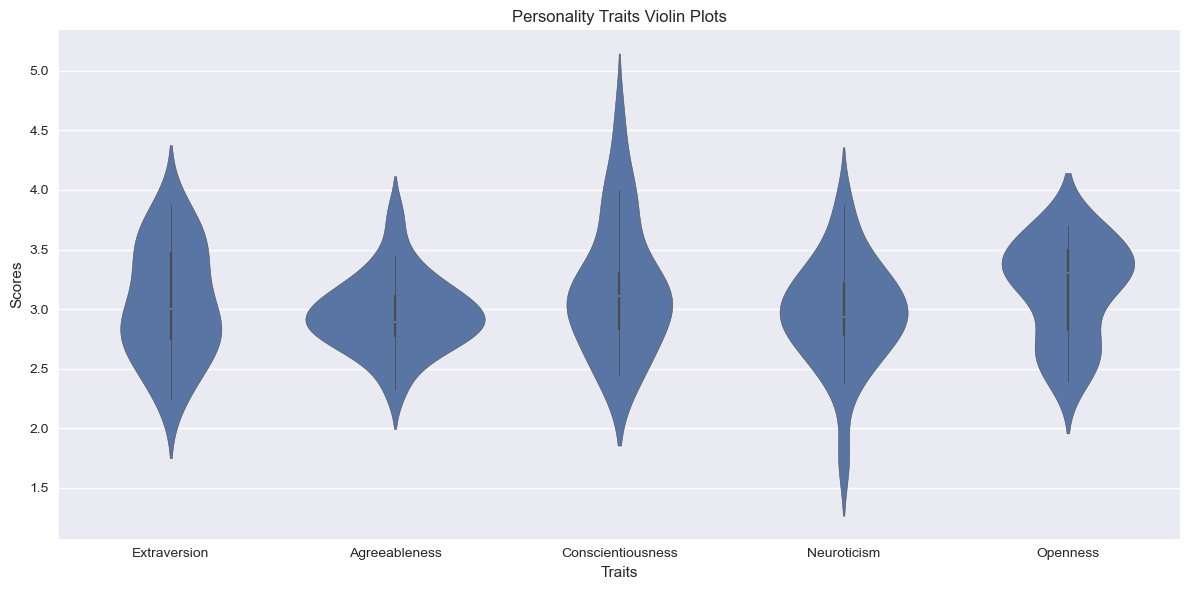

In [12]:
def violin_plots(df):
    df_melted = df.melt(id_vars=['Persona'], var_name='Trait', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Trait', y='Score', data=df_melted)
    plt.title("Personality Traits Violin Plots")
    plt.xlabel("Traits")
    plt.ylabel("Scores")
    plt.tight_layout()
    plt.show()

violin_plots(df)

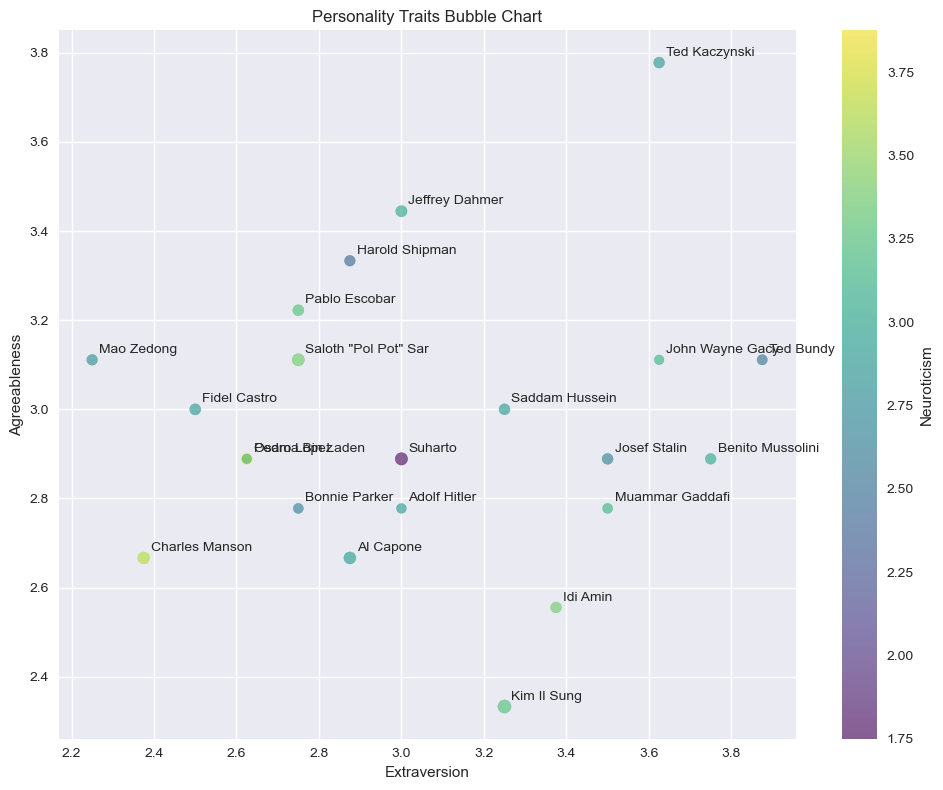

In [13]:
def bubble_chart(df):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df['Extraversion'], df['Agreeableness'], 
                          s=df['Conscientiousness']*20, 
                          c=df['Neuroticism'], cmap='viridis', 
                          alpha=0.6)
    plt.colorbar(scatter, label='Neuroticism')
    plt.xlabel('Extraversion')
    plt.ylabel('Agreeableness')
    plt.title('Personality Traits Bubble Chart')
    
    # Add annotations for each point
    for i, txt in enumerate(df['Persona']):
        plt.annotate(txt, (df['Extraversion'][i], df['Agreeableness'][i]), 
                     xytext=(5,5), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

bubble_chart(df)

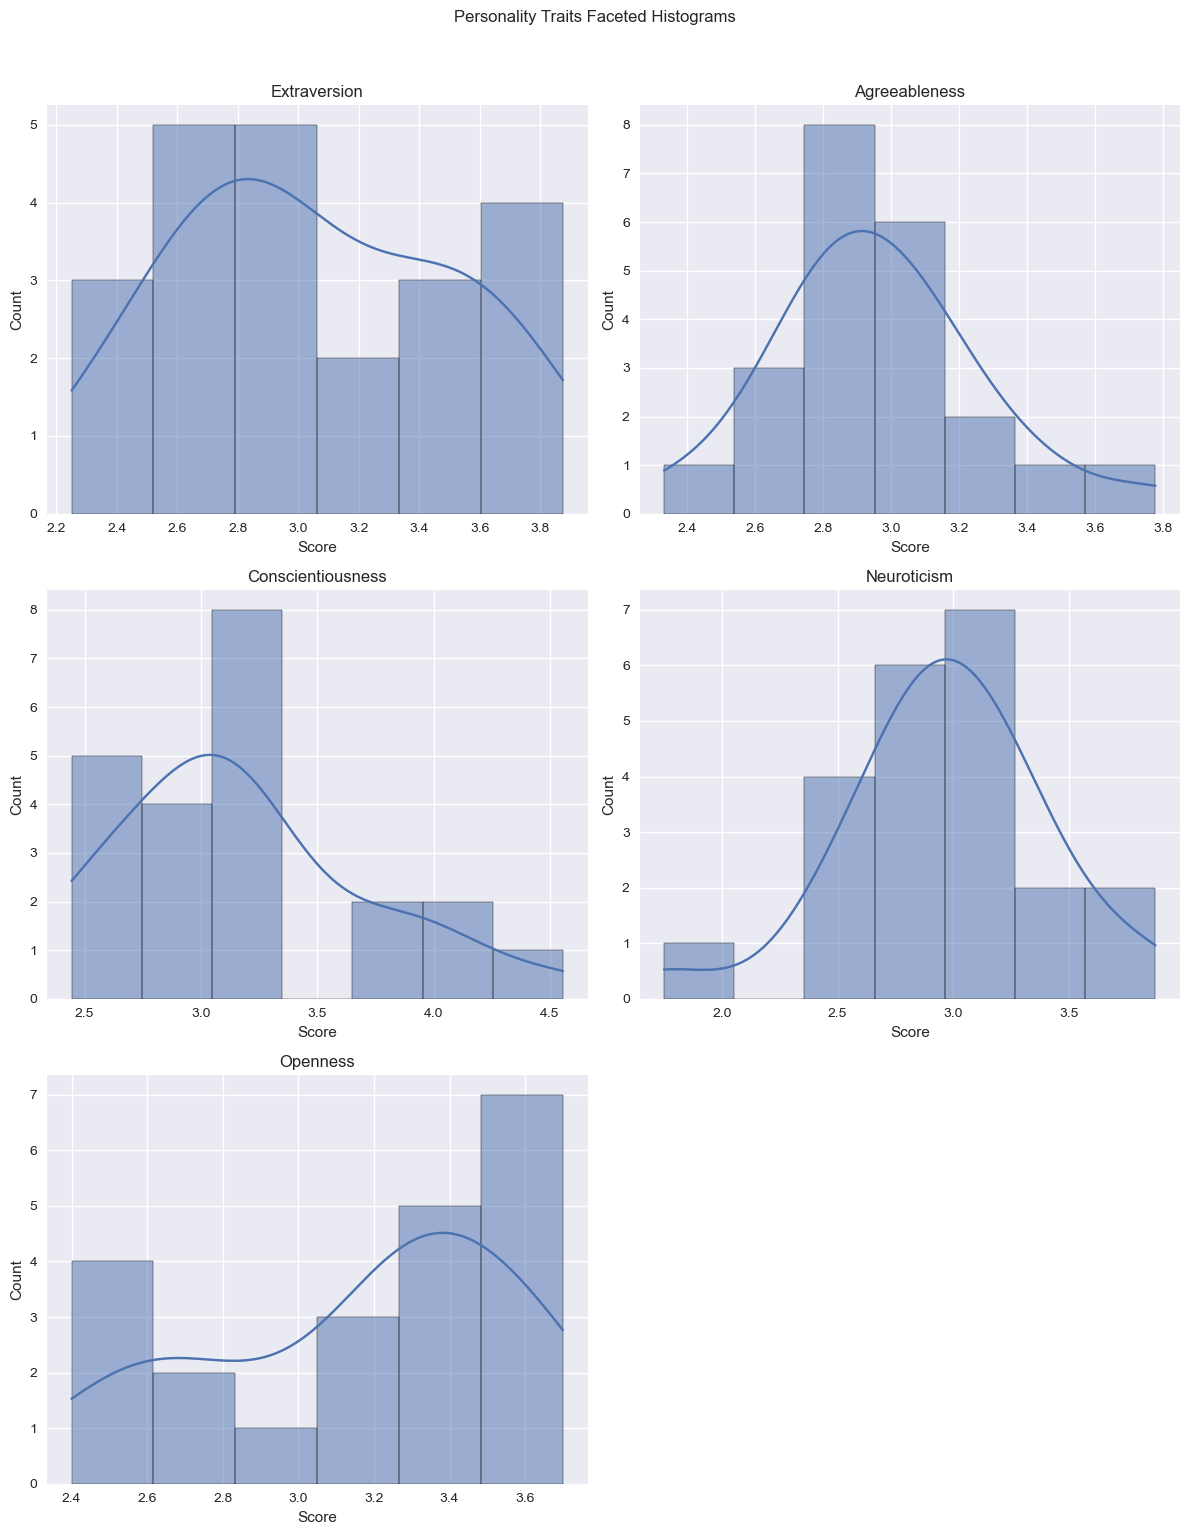

In [14]:
def faceted_histograms(df):
    traits = df.columns[1:]  # Exclude 'Persona' column
    fig, axes = plt.subplots(3, 2, figsize=(12, 15))
    fig.suptitle("Personality Traits Faceted Histograms", y=1.02)
    
    for i, trait in enumerate(traits):
        row = i // 2
        col = i % 2
        sns.histplot(df[trait], kde=True, ax=axes[row, col])
        axes[row, col].set_title(trait)
        axes[row, col].set_xlabel('Score')
        axes[row, col].set_ylabel('Count')
    
    # Remove the empty subplot
    fig.delaxes(axes[2, 1])
    plt.tight_layout()
    plt.show()

faceted_histograms(df)